In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import shap


In [ ]:
# Load the dataset
data = pd.read_csv("/content/insurance_claims.csv")  # Replace with your dataset's file path

# Display basic info
print(data.info())
print(data.head())

# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    if col != 'fraud_reported':  # Avoid encoding the target variable yet
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

# Encode the target variable
data['fraud_reported'] = data['fraud_reported'].map({'Y': 1, 'N': 0})

# Fill missing values
data.fillna(data.median(), inplace=True)

# Split features and target
X = data.drop(columns=['fraud_reported', '_c39'], errors='ignore')  # Drop irrelevant column if present
y = data['fraud_reported']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

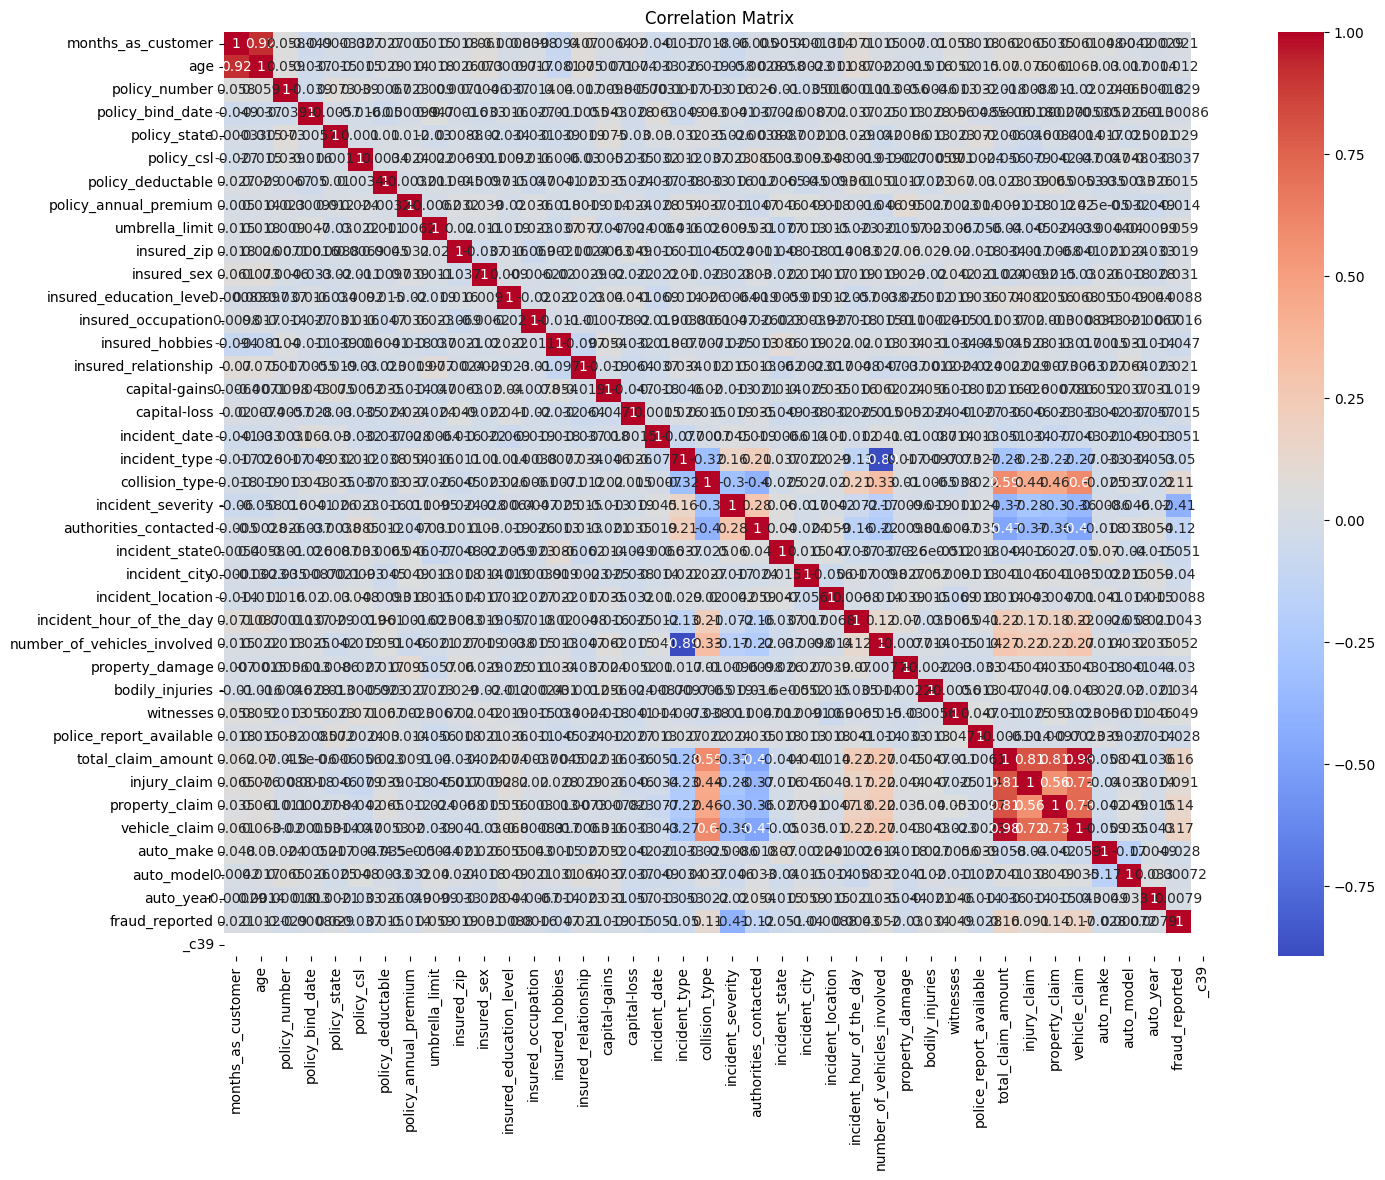

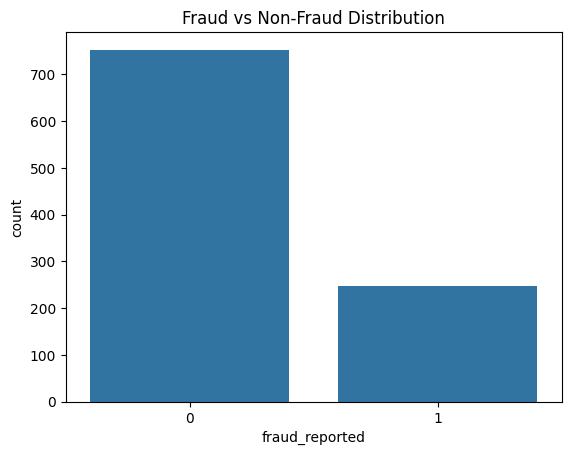

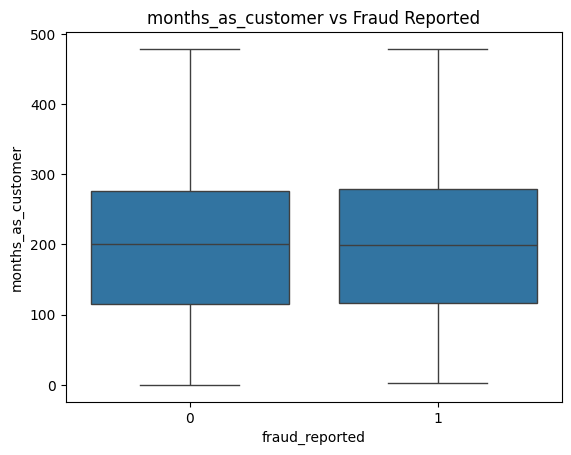

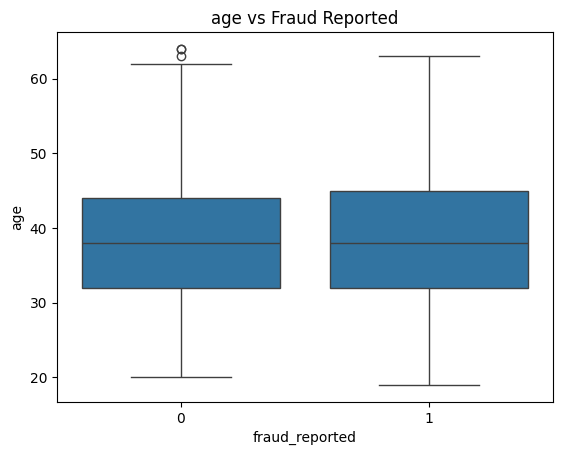

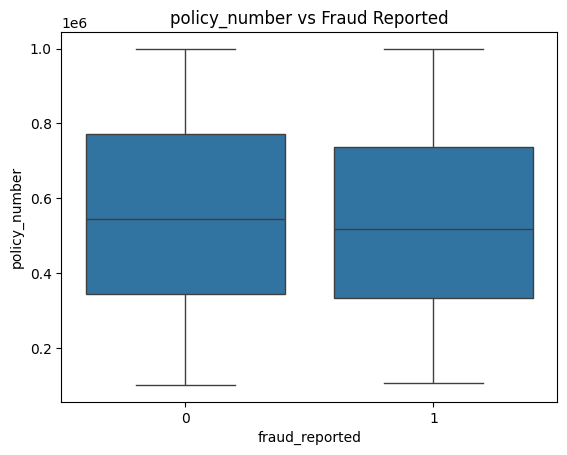

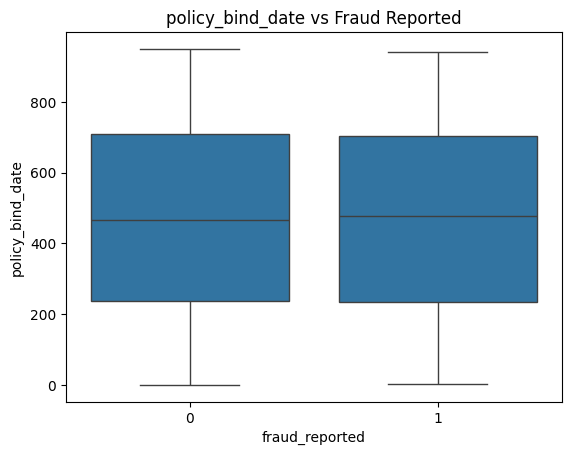

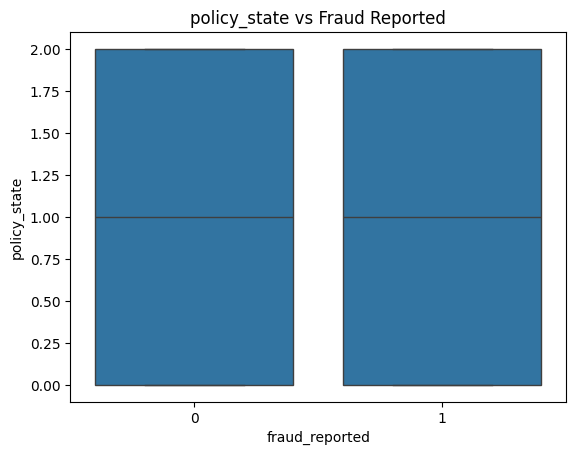

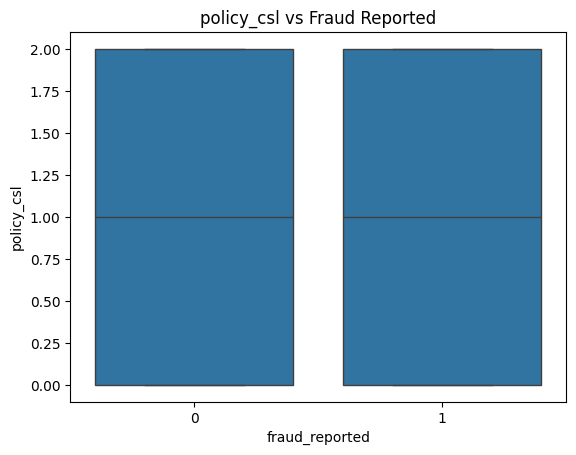

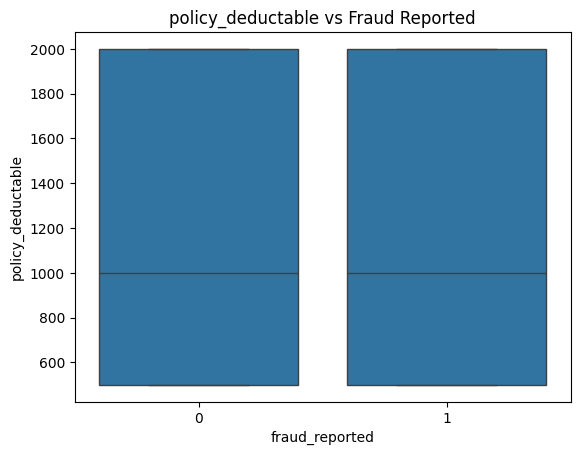

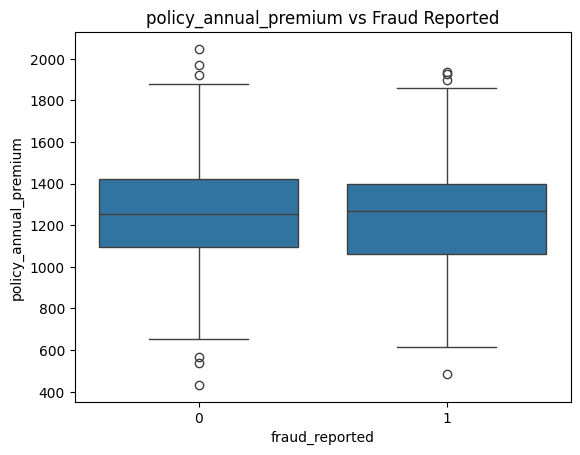

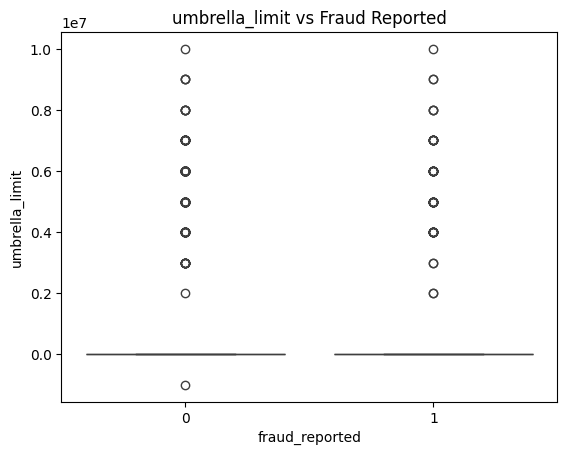

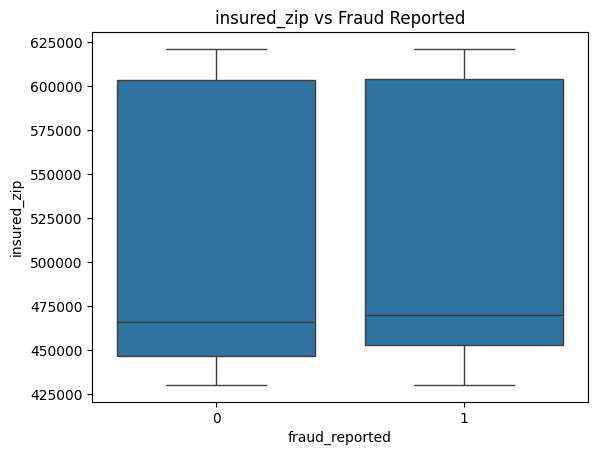

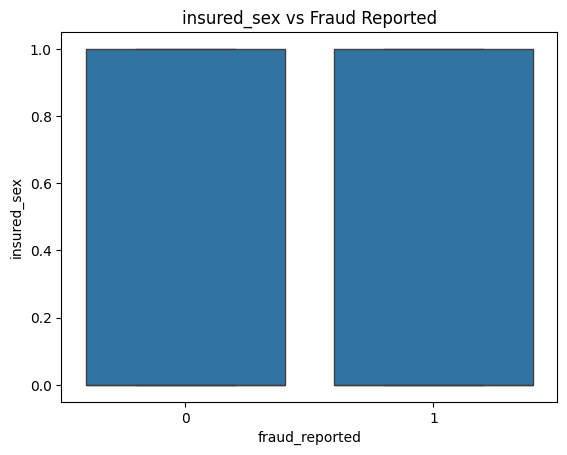

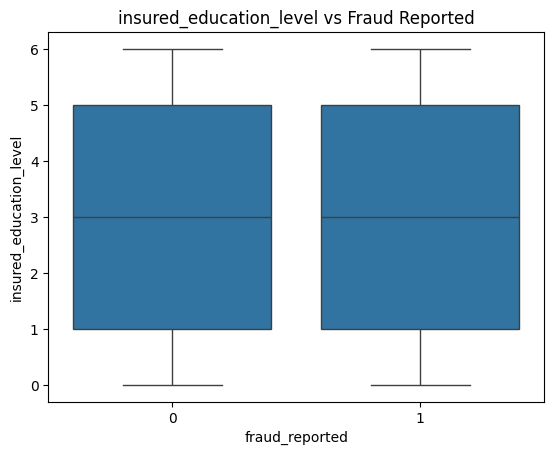

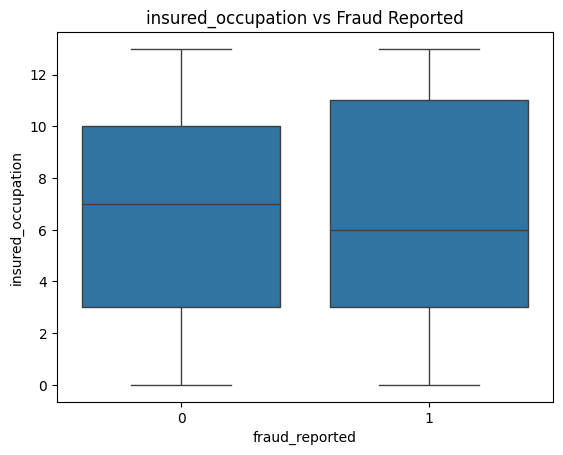

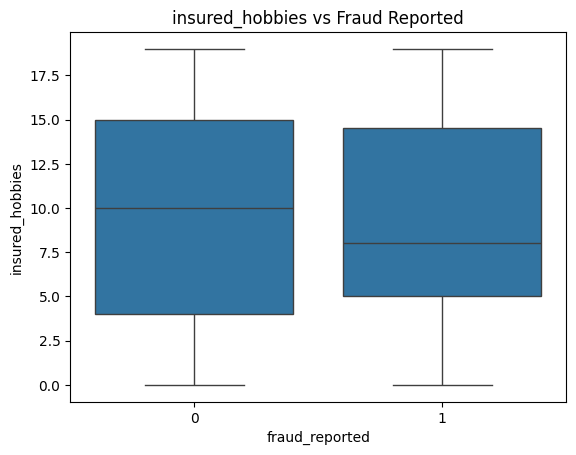

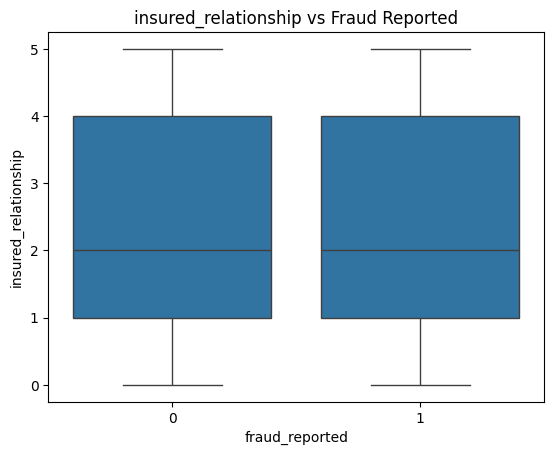

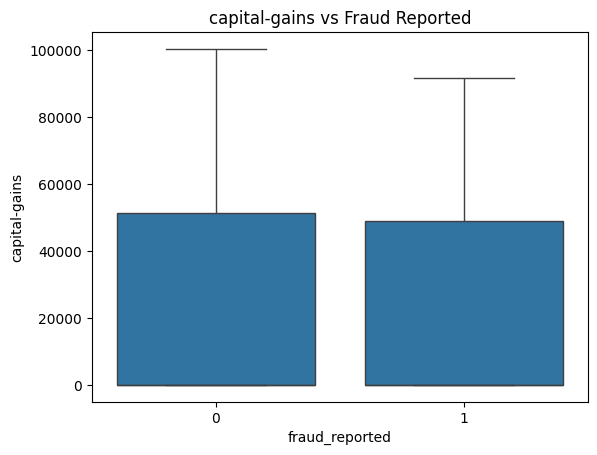

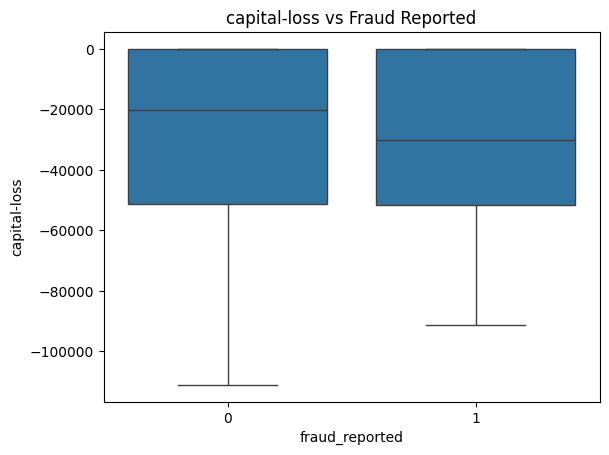

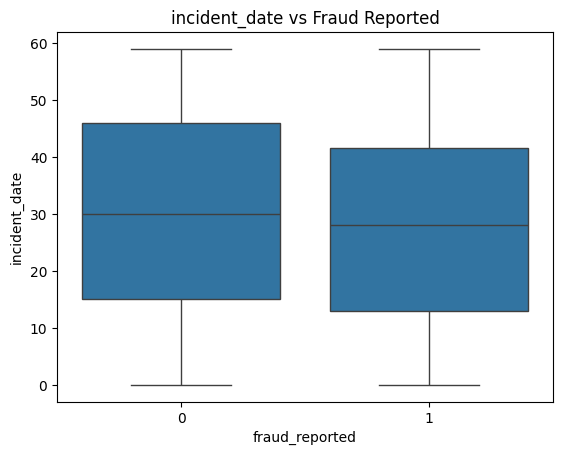

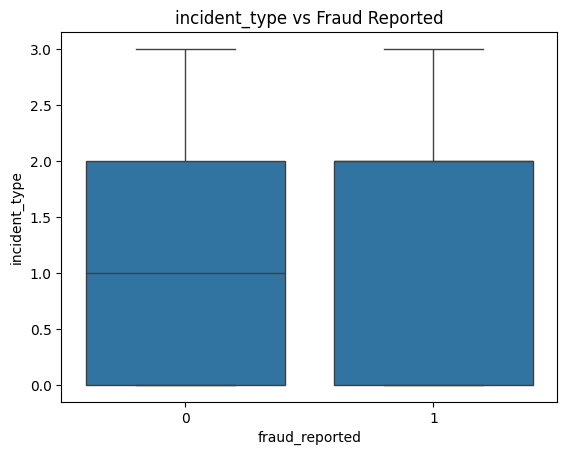

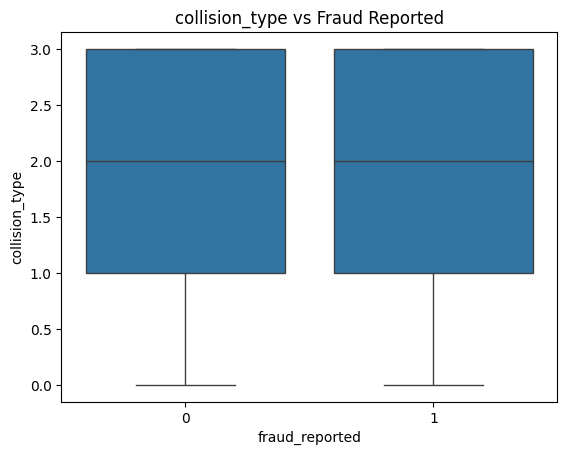

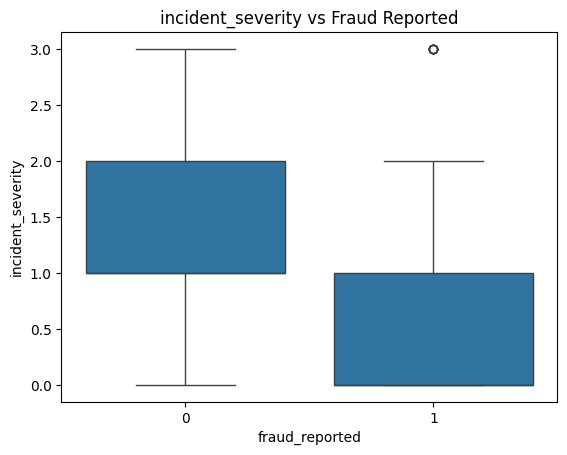

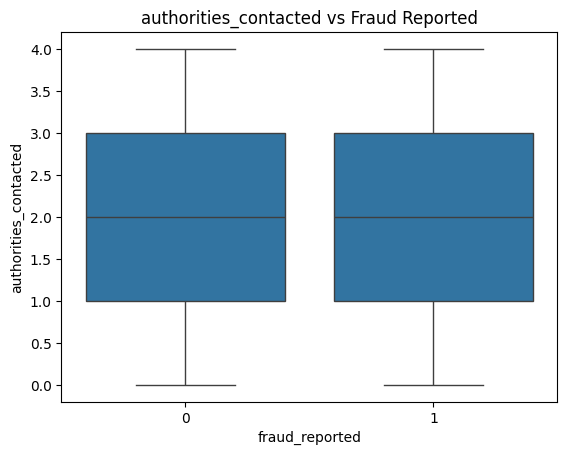

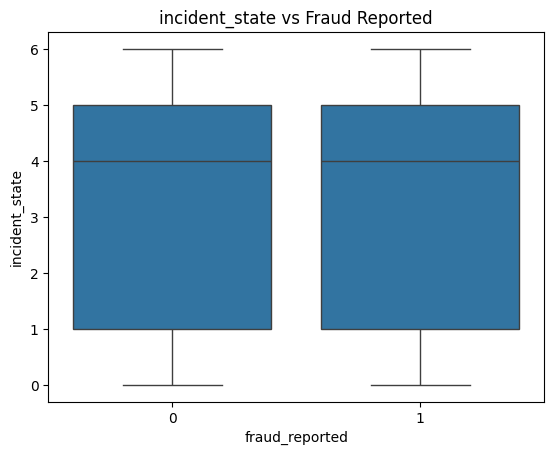

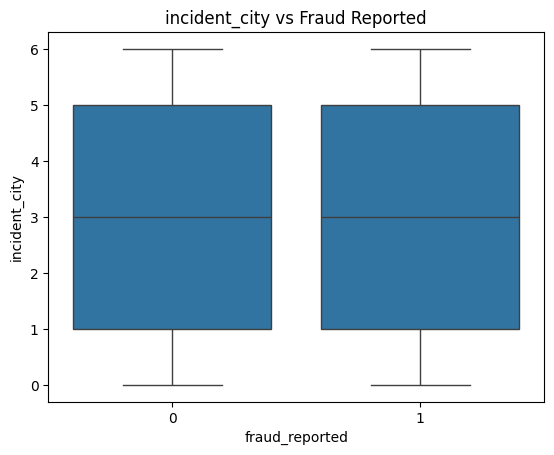

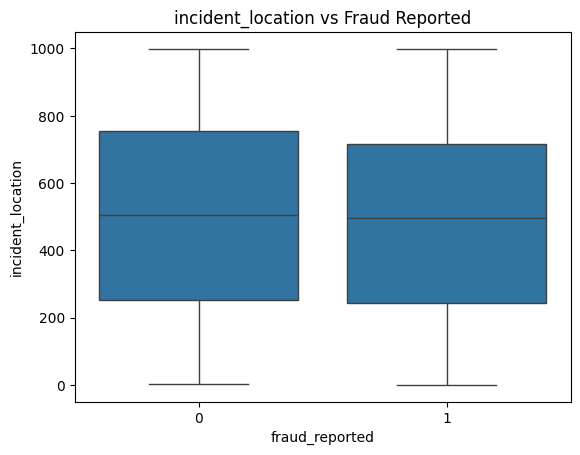

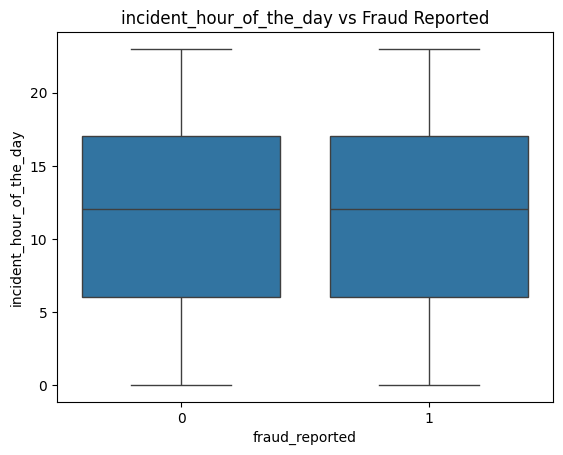

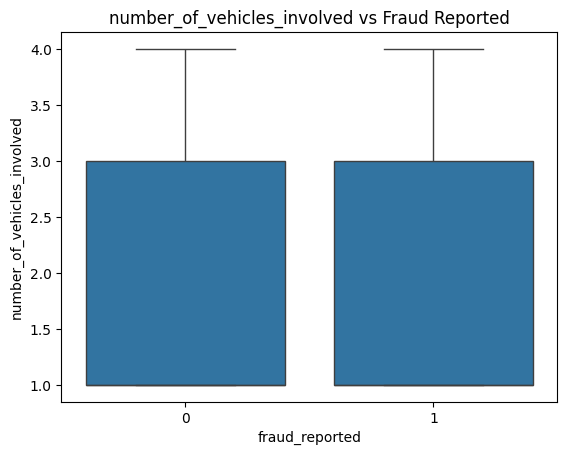

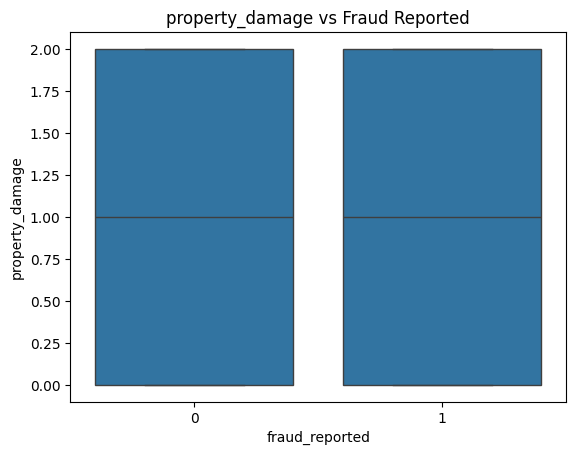

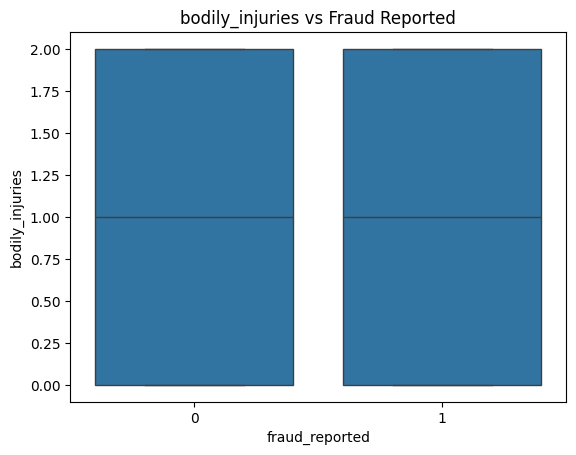

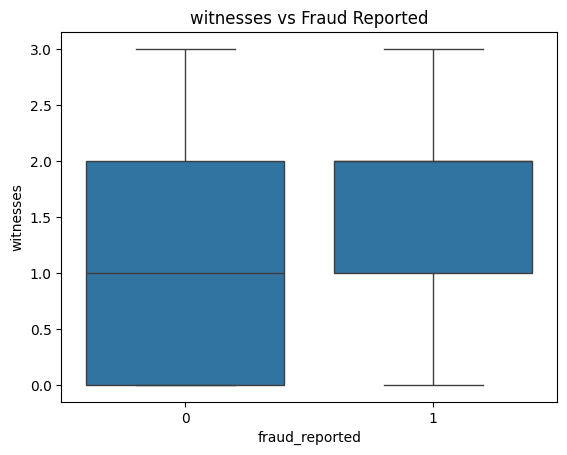

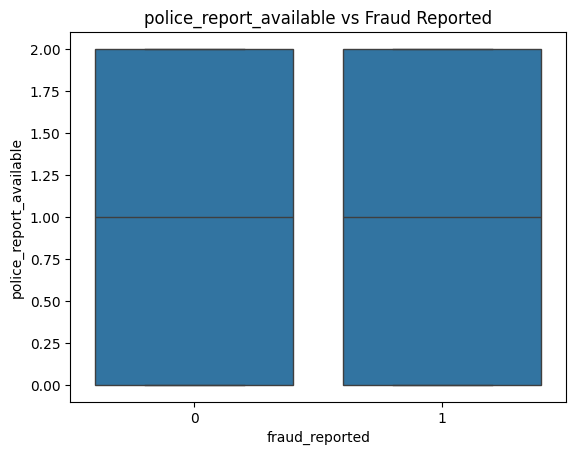

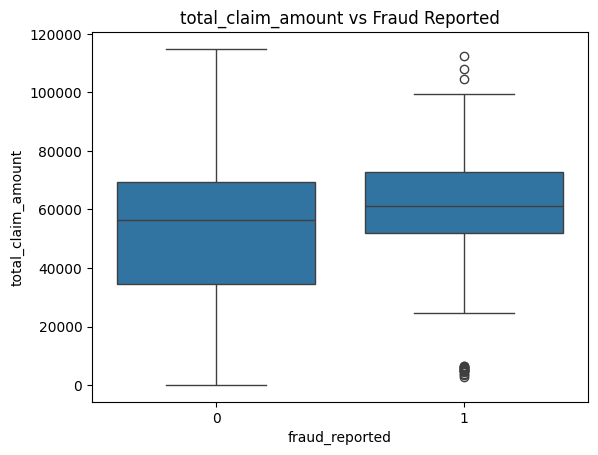

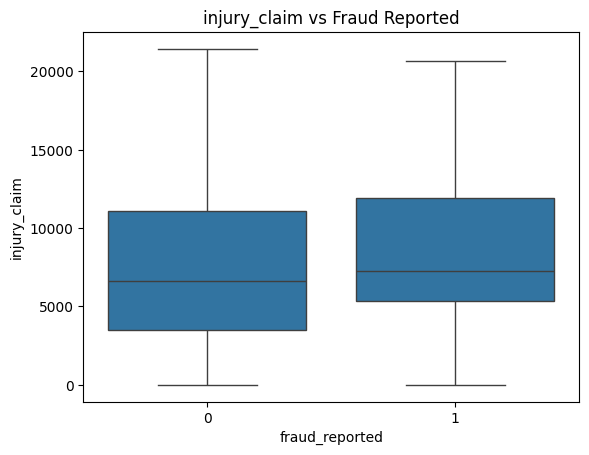

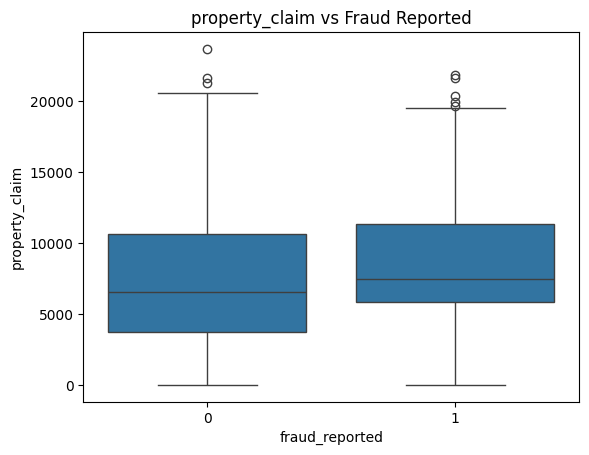

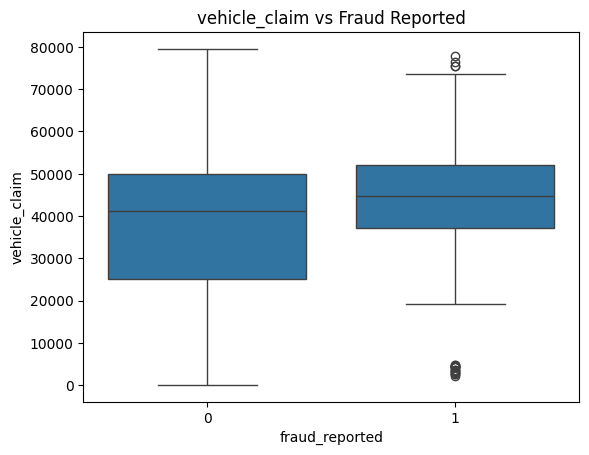

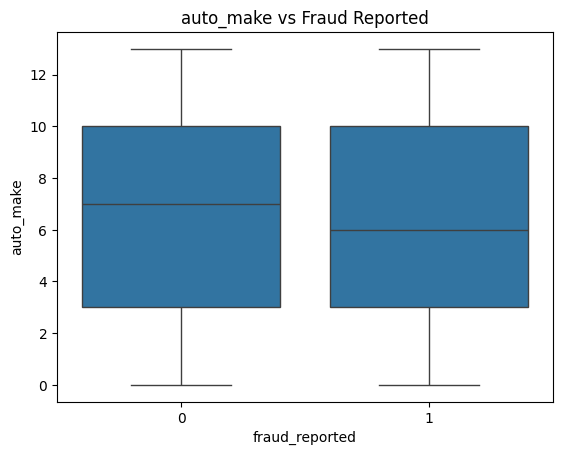

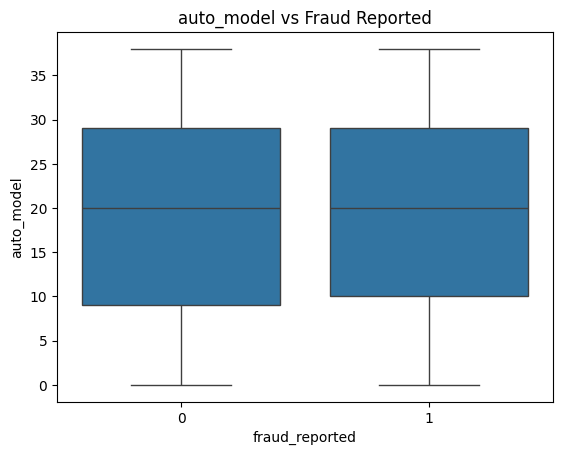

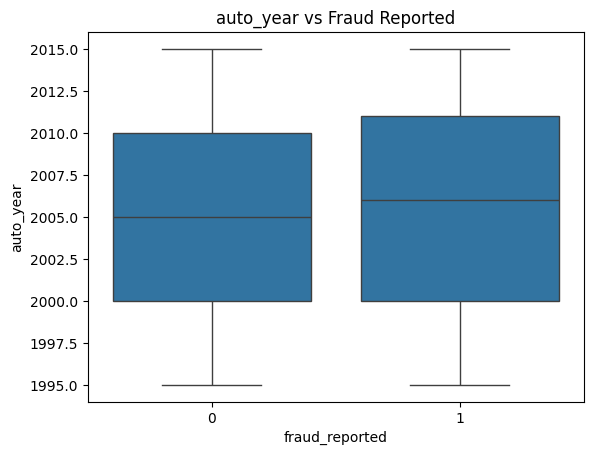

In [ ]:
# Correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution of fraud vs non-fraud
sns.countplot(x='fraud_reported', data=data)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

# Explore individual features
for col in X.columns:
    if X[col].dtype != 'object':  # Only numerical columns
        sns.boxplot(x=y, y=X[col])
        plt.title(f"{col} vs Fraud Reported")
        plt.show()
    else:
        sns.countplot(x=col, hue=y, data=data)
        plt.title(f"{col} Distribution by Fraud Reported")
        plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       145
           1       0.52      0.27      0.36        55

    accuracy                           0.73       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.70      0.73      0.70       200

Confusion Matrix:
 [[131  14]
 [ 40  15]]
                        Feature  Importance
20            incident_severity    0.191195
13              insured_hobbies    0.061152
9                   insured_zip    0.041367
33               property_claim    0.038436
32                 injury_claim    0.037707
7         policy_annual_premium    0.036662
2                 policy_number    0.036388
31           total_claim_amount    0.033179
17                incident_date    0.033057
34                vehicle_claim    0.032567
3              policy_bind_date    0.030742
24            incident_location    0.029971
0            months_as_customer    

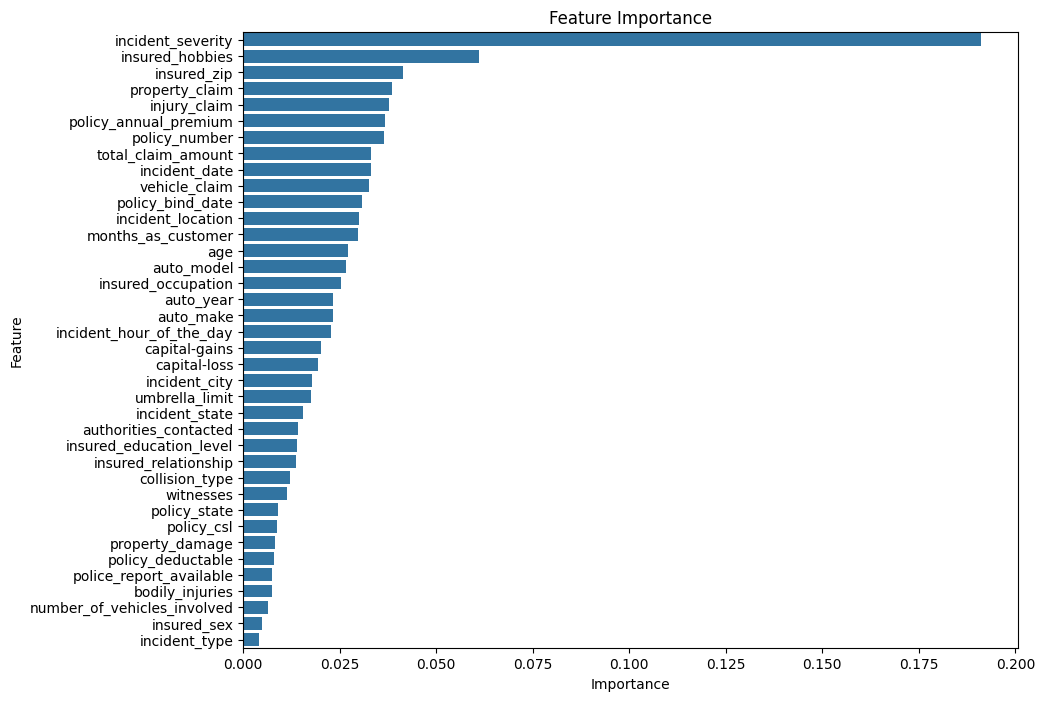

In [ ]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()
